In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif

In [40]:
df = pd.read_csv("mobile phone price prediction.csv")

## Data Preprocessing

In [41]:
df.isnull().sum()

Unnamed: 0             0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

In [42]:
df.shape

(1370, 18)

In [43]:
df.isnull().sum() / df.shape[0] * 100

Unnamed: 0            0.000000
Name                  0.000000
Rating                0.000000
Spec_score            0.000000
No_of_sim             0.000000
Ram                   0.000000
Battery               0.000000
Display               0.000000
Camera                0.000000
External_Memory       0.000000
Android_version      32.335766
Price                 0.000000
company               0.000000
Inbuilt_memory        1.386861
fast_charging         6.496350
Screen_resolution     0.145985
Processor             2.043796
Processor_name        0.000000
dtype: float64

In [44]:
import warnings
warnings.filterwarnings("ignore")

categorical_data = df.select_dtypes(include = ["object", "category"])
numerical_data = df.select_dtypes(include = ["int", "float"])

for x in categorical_data:
  df[x].fillna(df[x].mode()[0], inplace = True)

for x in numerical_data:
  df[x].fillna(np.mean(df[x]), inplace = True)

df.isnull().sum()

Unnamed: 0           0
Name                 0
Rating               0
Spec_score           0
No_of_sim            0
Ram                  0
Battery              0
Display              0
Camera               0
External_Memory      0
Android_version      0
Price                0
company              0
Inbuilt_memory       0
fast_charging        0
Screen_resolution    0
Processor            0
Processor_name       0
dtype: int64

In [45]:
df.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,18W Fast Charging,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1370 non-null   int64  
 1   Name               1370 non-null   object 
 2   Rating             1370 non-null   float64
 3   Spec_score         1370 non-null   int64  
 4   No_of_sim          1370 non-null   object 
 5   Ram                1370 non-null   object 
 6   Battery            1370 non-null   object 
 7   Display            1370 non-null   object 
 8   Camera             1370 non-null   object 
 9   External_Memory    1370 non-null   object 
 10  Android_version    1370 non-null   object 
 11  Price              1370 non-null   object 
 12  company            1370 non-null   object 
 13  Inbuilt_memory     1370 non-null   object 
 14  fast_charging      1370 non-null   object 
 15  Screen_resolution  1370 non-null   object 
 16  Processor          1370 

In [47]:
df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [48]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [49]:
df.head()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,18W Fast Charging,720 x 1600 px,Octa Core,Helio G88
4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [50]:
df.columns

Index(['Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery',
       'Display', 'Camera', 'External_Memory', 'Android_version', 'Price',
       'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution',
       'Processor', 'Processor_name'],
      dtype='object')

In [51]:
replaced = {"Oppo" : "OPPO", "IQOO" : "iQOO", "Poco" : "POCO", "Itel" : "itel"}
df["company"] = df["company"].replace(replaced, regex = True)

In [52]:
replaced_pro = {"Deca Core Processor" : "Deca Core", "Nine Cores" : "Nine Core", "Nine-Cores" : "Nine Core", "Octa Core Processor" : "Octa Core",
                "2.3 GHz Processor" : "2.3 GHz", "2 GHz Processor" : "2 GHz", "1.8 GHz Processor" : "1.8 GHz", "1.6 GHz Processor" : "1.6 GHz",
                "1.3 GHz Processor" : "1.3 GHz"}
df["Processor"] = df["Processor"].replace(replaced_pro, regex = True)

In [53]:
# Check unique values in categorical fields
unique_values = {
    "Name" : df["Name"].unique(),
    "No_of_sim": df["No_of_sim"].unique(),
    "Ram" : df["Ram"].unique(),
    "Battery" : df["Battery"].unique(),
    "Display" : df["Display"].unique(),
    "Camera" : df["Camera"].unique(),
    "External_Memory" : df["External_Memory"].unique(),
    "Android_version" : df["Android_version"].unique(),
    "company" : df["company"].unique(),
    "Inbuilt_memory" : df["Inbuilt_memory"].unique(),
    "fast_charging" : df["fast_charging"].unique(),
    "Screen_resolution" : df["Screen_resolution"].unique(),
    "Processor" : df["Processor"].unique(),
    "Processor_name" : df["Processor_name"].unique()
}
print(df.nunique())

Name                 1334
Rating                 20
Spec_score             50
No_of_sim               9
Ram                    16
Battery                89
Display                89
Camera                347
External_Memory        85
Android_version        23
Price                 449
company                22
Inbuilt_memory         10
fast_charging          38
Screen_resolution     141
Processor              10
Processor_name        276
dtype: int64


In [54]:
## Checking the unique values in company size column
unique_values["company"]

array(['Samsung', 'Vivo', 'Realme', 'OPPO', 'iQOO', 'POCO', 'Honor',
       'Nothing', 'Google', 'itel', 'Asus', 'LG', 'Lenovo', 'Gionee',
       'Motorola', 'OnePlus', 'Xiaomi', 'Tecno', 'Huawei', 'Lava',
       'Coolpad', 'TCL'], dtype=object)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    1370 non-null   object 
 10  Price              1370 non-null   object 
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1370 non-null   object 
 13  fast_charging      1370 non-null   object 
 14  Screen_resolution  1370 non-null   object 
 15  Processor          1370 non-null   object 
 16  Processor_name     1370 

In [56]:
## Removing symbols from price
df["Price"] = df["Price"].astype(str)
df["Price"] = df["Price"].str.replace(",", "", regex = False)
df["Price"] = pd.to_numeric(df["Price"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1370 non-null   object 
 1   Rating             1370 non-null   float64
 2   Spec_score         1370 non-null   int64  
 3   No_of_sim          1370 non-null   object 
 4   Ram                1370 non-null   object 
 5   Battery            1370 non-null   object 
 6   Display            1370 non-null   object 
 7   Camera             1370 non-null   object 
 8   External_Memory    1370 non-null   object 
 9   Android_version    1370 non-null   object 
 10  Price              1370 non-null   int64  
 11  company            1370 non-null   object 
 12  Inbuilt_memory     1370 non-null   object 
 13  fast_charging      1370 non-null   object 
 14  Screen_resolution  1370 non-null   object 
 15  Processor          1370 non-null   object 
 16  Processor_name     1370 

In [57]:
name = unique_values["Name"].tolist()
df1 = df.loc[df["Name"].isin(name)]

In [58]:
# Plotting the Price distribution

fig = px.histogram(df1, x = "Price", nbins = 30, title = "FREQUENCY DISTRIBUTION OF PHONE PRICES")
fig.update_layout( title_x = 0.5, title_y = 0.95, xaxis_title = "Price", yaxis_title = "Frequency", title_font_size = 30, title_font_color = "purple")
fig.show()

In [59]:
df1 = df1.sort_values(by = "Name", ascending = True)
df1 = df1.reindex(columns = ["Name"] + [col for col in df1.columns if col != "Name"])
df1

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
660,Asus 10Z 5G,4.30,77,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,4200 mAh Battery,6.52 inches,50 MP + 12 MP + 5 MP Triple Rear &amp; 12 MP F...,Android v12,13,49990,Asus,128 GB inbuilt,120W Fast Charging,1080 x 2460 px,Octa Core,Snapdragon 8 Gen1 Plus
662,Asus 9Z 5G,4.35,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,4300 mAh Battery,5.9 inches,50 MP + 12 MP Dual Rear &amp; 12 MP Front Camera,Android v12,13,59999,Asus,128 GB inbuilt,30W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
664,Asus ROG Phone 3 (16GB RAM + 512GB),4.65,89,"Dual Sim, 3G, 4G, 5G, VoLTE,",16 GB RAM,6000 mAh Battery,6.59 inches,64 MP + 13 MP + 5 MP Triple Rear &amp; 24 MP F...,Android v10,13,64999,Asus,512 GB inbuilt,30W Fast Charging,2340 x 1080 px,Octa Core,Snapdragon 865+
679,Asus ROG Phone 5s Pro 5G,4.45,89,"Dual Sim, 3G, 4G, 5G, VoLTE,",18 GB RAM,6000 mAh Battery,6.78 inches,64 MP + 13 MP + 5 MP Triple Rear &amp; 24 MP F...,Android v11,13,79999,Asus,512 GB inbuilt,65W Fast Charging,1080 x 2448 px,Octa Core,Snapdragon 888+
667,Asus ROG Phone 6,4.70,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,6000 mAh Battery,6.78 inches,50 MP + 13 MP + 5 MP Triple Rear &amp; 12 MP F...,Memory Card Not Supported,12,71999,Asus,256 GB inbuilt,65W Fast Charging,1080 x 2448 px,Octa Core,Snapdragon 8+ Gen1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,itel P55T,4.60,67,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.56 inches,50 MP + 0.08 MP Dual Rear &amp; 8 MP Front Camera,Memory Card Supported,14,7394,itel,128 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Unisoc T606
658,itel RS4,4.55,72,"Dual Sim, 3G, 4G,",8 GB RAM,5000 mAh Battery,6.56 inches,50 MP Dual Rear &amp; 8 MP Front Camera,Android v13,13,8990,itel,128 GB inbuilt,45W Fast Charging,720 x 1612 px,Octa Core,Helio G99
651,itel S16 Pro,4.55,57,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.6 inches,8 MP + 2 MP + 0.3 MP Triple Rear &amp; 8 MP Fr...,"Memory Card Supported, upto 32 GB",10,6990,itel,32 GB inbuilt,18W Fast Charging,1600 x 720 px Display with Punch Hole,1.3 GHz,Quad Core
1323,itel S23 Plus,4.25,77,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.78 inches,50 MP + 0.08 MP Dual Rear &amp; 32 MP Front Ca...,Android v13,13,14499,itel,256 GB inbuilt,18W Fast Charging,1080 x 2400 px Display with Punch Hole,Octa Core,Tiger T616


In [60]:
df_name = df1.groupby(["Name"]).agg({ "Price" : "mean"}).reset_index()
df_name = df_name.sort_values(by = "Price", ascending =False)

df_name

,Name,Price
146,Huawei Mate 30 RS Porsche Design,214990.0
961,Samsung Galaxy Z Fold 6 Ultra,199990.0
149,Huawei Mate 40 RS Porsche Design,191999.0
92,Honor Magic V2 RSR Porsche Design,187990.0
958,Samsung Galaxy Z Fold 5 (12GB RAM + 1TB),184999.0
...,...,...
1217,Xiaomi Redmi A3,6999.0
1331,itel S16 Pro,6990.0
1115,Vivo Y03,6990.0
671,Realme C21,6950.0


In [61]:
top = df_name.head(10)
bottom = df_name.tail(10)

palette1 = ["#" + "".join([hex(x)[2:].zfill(2) for x in np.random.randint(0, 256, 3)]) for _ in range(10)]
palette2 = ["#" + "".join([hex(x)[2:].zfill(2) for x in np.random.randint(0, 256, 3)]) for _ in range(10)]

In [62]:
"""fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].bar(top["Name"], top["Price"], color = palette1)
axes[0].set_xlabel("Name", color = "#0a8a8c", fontsize = 20)
axes[0].set_ylabel("Price", color = "#0a8a8c", fontsize = 20)
axes[0].set_title("TOP 10 PHONE WITH THE HIGHEST SELLING PRICE", color = "#bf3d9d", fontsize = 20)
axes[0].set_xticks(range(len(top)))
axes[0].set_xticklabels(top["Name"], rotation = 90, fontsize = 15)

axes[1].bar(bottom["Name"], bottom["Price"], color = palette2)
axes[1].set_xlabel("Name", color="#0a8a8c", fontsize = 20)
axes[1].set_ylabel("Price", color="#0a8a8c", fontsize = 20)
axes[1].set_title("BOTTOM 10 PHONE WITH THE LOWEST SELLING PRICE", color = "#bf3d9d", fontsize = 20)
axes[1].set_xticks(range(len(bottom)))
axes[1].set_xticklabels(bottom["Name"], rotation = 90, fontsize = 15)

plt.show()""" 

'fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))\n\naxes[0].bar(top["Name"], top["Price"], color = palette1)\naxes[0].set_xlabel("Name", color = "#0a8a8c", fontsize = 20)\naxes[0].set_ylabel("Price", color = "#0a8a8c", fontsize = 20)\naxes[0].set_title("TOP 10 PHONE WITH THE HIGHEST SELLING PRICE", color = "#bf3d9d", fontsize = 20)\naxes[0].set_xticks(range(len(top)))\naxes[0].set_xticklabels(top["Name"], rotation = 90, fontsize = 15)\n\naxes[1].bar(bottom["Name"], bottom["Price"], color = palette2)\naxes[1].set_xlabel("Name", color="#0a8a8c", fontsize = 20)\naxes[1].set_ylabel("Price", color="#0a8a8c", fontsize = 20)\naxes[1].set_title("BOTTOM 10 PHONE WITH THE LOWEST SELLING PRICE", color = "#bf3d9d", fontsize = 20)\naxes[1].set_xticks(range(len(bottom)))\naxes[1].set_xticklabels(bottom["Name"], rotation = 90, fontsize = 15)\n\nplt.show()'

In [63]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top["Name"], y = top["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bottom["Name"], y = bottom["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "HIGHEST AND LOWEST SELLING PHONES PRICE", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [64]:
df_com = df1.groupby(["company"]).agg({ "Price" : "mean"}).reset_index()
df_com = df_com.sort_values(by = "Price", ascending = False)

df_com

,company,Price
0,Asus,78228.095238
3,Google,75473.739130
17,Tecno,62666.461538
5,Huawei,53596.725806
6,LG,50912.666667
11,OPPO,46526.246154
4,Honor,41796.988636
12,OnePlus,40081.706667
15,Samsung,39658.596685
10,Nothing,38616.600000


In [65]:
fig = px.bar(df_com, x = "Price", y = "company", color = "company")
fig.update_layout(showlegend = True, title = "AVERAGE PHONE PRICE BY COMPANY", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [66]:
df_rat = df1.groupby(["company"]).agg({"Rating" : "mean"}).reset_index()
df_rat = df_rat.sort_values(by = "Rating", ascending = False)

df_rat

,company,Rating
1,Coolpad,4.600000
2,Gionee,4.470000
0,Asus,4.447619
8,Lenovo,4.442857
17,Tecno,4.426923
20,iQOO,4.419828
19,Xiaomi,4.418889
11,OPPO,4.412308
4,Honor,4.394886
5,Huawei,4.387903


In [67]:
fig = px.bar(df_rat, x = "Rating", y = "company", color = "company")
fig.update_layout(showlegend = True, title = "AVERAGE PHONE RATING BY COMPANY", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [68]:
df_cool = df1[(df1["company"] == "Coolpad")][["Name", "Price"]]
df_cool = df_cool.sort_values(by = "Price", ascending = False)

df_cool

,Name,Price
1343,Coolpad Cool 30 Pro,23990


In [69]:
fig = px.bar(df_cool, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "COOLPAD PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [70]:
df_gi = df1[(df1["company"] == "Gionee")][["Name", "Price"]]
df_gi = df_gi.sort_values(by = "Price", ascending = False)

df_gi

,Name,Price
705,Gionee F1 Plus,13990
704,Gionee M3,11990
702,Gionee G14 Pro,7990
703,Gionee P50 Pro,7990
701,Gionee M12 Pro,7499


In [71]:
fig = px.bar(df_gi, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "GIONEE PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [72]:
df_as = df1[(df1["company"] == "Asus")][["Name", "Price"]]
df_as = df_as.sort_values(by = "Price", ascending = False)

df_as

,Name,Price
671,Asus ROG Phone 8 Ultimate,109900
672,Asus ROG Phone 6D Ultimate,107990
673,Asus ROG Phone 8 Pro,94999
674,Asus ROG Phone 7 Pro,94990
675,Asus ROG Phone 6 Pro 5G,89999
676,Asus ROG Phone 8,89990
677,Asus ROG Phone 6s Pro 5G,82999
678,Asus Zenfone 11 Ultra,81990
679,Asus ROG Phone 5s Pro 5G,79999
680,Asus ROG Phone 7D,79990


In [73]:
fig = px.bar(df_as, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "ASUS PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [74]:
df_len = df1[(df1["company"] == "Lenovo")][["Name", "Price"]]
df_len = df_len.sort_values(by = "Price", ascending = False)

df_len

,Name,Price
700,Lenovo Legion Duel 3 5G,64999
699,Lenovo Legion Pro 2,59999
698,Lenovo Legion Phone 3 5G,54990
697,Lenovo Legion Halo,49990
696,Lenovo Legion Y90,46990
695,Lenovo Legion Y70,34990
694,Lenovo K13 Pro,13990
693,Lenovo K14 Note,11490
691,Lenovo K15 Plus,9990
692,Lenovo K14,9499


In [75]:
fig = px.bar(df_len, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "LENOVO PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [76]:
df_tec = df1[(df1["company"] == "Tecno")][["Name", "Price"]]
df_tec = df_tec.sort_values(by = "Price", ascending = False)

df_tec

,Name,Price
1229,Tecno Phantom Ultimate,99990
1230,Tecno Phantom V Yoga,89990
1228,Tecno Phantom V2 Fold,89990
1226,Tecno Phantom V Fold (12GB RAM + 512GB),74999
1227,Tecno Phantom V Fold,69899
1225,Tecno Phantom X4 Pro,59990
1223,Tecno Phantom V Flip,54999
1222,Tecno Phantom X3 Pro,54990
1224,Tecno Phantom X4,52990
1221,Tecno Phantom X3,49990


In [77]:
fig = px.bar(df_tec, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "TECNO PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [78]:
df_iq = df1[(df1["company"] == "iQOO")][["Name", "Price"]]
df_iq = df_iq.sort_values(by = "Price", ascending = False)

df_iq

,Name,Price
455,iQOO 9 Pro 5G (12GB RAM + 256GB),76429
454,iQOO 13 Pro,72990
452,iQOO 12 Pro,64990
453,iQOO 9 Pro 5G,64990
451,iQOO 13,64990
450,iQOO 11 Pro 5G,58990
449,iQOO 10 Pro 5G,58990
448,iQOO 12 5G (16GB RAM + 512GB),57999
447,iQOO 12 5G,52999
446,iQOO 9 5G (12GB RAM + 256GB),52652


In [79]:
top_iq = df_iq.head(10)
bot_iq = df_iq.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_iq["Name"], y = top_iq["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_iq["Name"], y = bot_iq["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "IQOO PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [80]:
df_xia = df1[(df1["company"] == "Xiaomi")][["Name", "Price"]]
df_xia = df_xia.sort_values(by = "Price", ascending = False)

df_xia

,Name,Price
1209,Xiaomi Redmi K70,29990
1201,Xiaomi Redmi Note 13 Pro Plus 5G,28517
1212,Xiaomi Redmi K50i 5G,27999
1213,Xiaomi Redmi Note 12 Pro Plus,27999
1206,Xiaomi Redmi Note 12 Turbo Harry Potter Edition,27990
...,...,...
1137,Xiaomi Redmi A3 (4GB RAM + 128GB),7890
1128,Xiaomi Redmi 13C 4G,7699
1147,Xiaomi Redmi 9A Sport,7699
1134,Xiaomi Redmi 10A (4GB RAM + 64GB),7689


In [81]:
top_xia = df_xia.head(10)
bot_xia = df_xia.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_xia["Name"], y = top_xia["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_xia["Name"], y = bot_xia["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "XIAOMI PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [82]:
df_op = df1[(df1["company"] == "OPPO")][["Name", "Price"]]
df_op = df_op.sort_values(by = "Price", ascending = False)

df_op

,Name,Price
394,OPPO X 2021,134999
395,Oppo Find X2 Pro AutoMobili Lamborghini Edition,129990
396,OPPO Find N4,119900
397,Oppo Find N3,114990
392,OPPO Find N4 Flip,99990
...,...,...
333,OPPO A55s 5G,14990
334,OPPO A59 5G,13999
337,OPPO A77s,13999
336,Oppo A78 4G,13999


In [83]:
top_op = df_op.head(10)
bot_op = df_op.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_op["Name"], y = top_op["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_op["Name"], y = bot_op["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "OPPO PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [84]:
df_hon = df1[(df1["company"] == "Honor")][["Name", "Price"]]
df_hon = df_hon.sort_values(by = "Price", ascending = False)

df_hon

,Name,Price
608,Honor Magic V2 RSR Porsche Design,187990
609,Honor Magic Vs Ultimate Edition,139999
610,Honor Magic Vs,124999
611,Honor Magic 6 RSR,114990
612,Honor Magic Fold 5G,104999
...,...,...
1298,Honor Play 6C,11990
1297,Honor X5 Plus,10990
1295,Honor Play 30,9999
1293,Honor Play 40C,9990


In [85]:
top_hon = df_hon.head(10)
bot_hon = df_hon.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_hon["Name"], y = top_hon["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_hon["Name"], y = bot_hon["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "HONOR PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [86]:
df_hua = df1[(df1["company"] == "Huawei")][["Name", "Price"]]
df_hua = df_hua.sort_values(by = "Price", ascending = False)

df_hua

,Name,Price
1279,Huawei Mate 30 RS Porsche Design,214990
1287,Huawei Mate 40 RS Porsche Design,191999
1284,Huawei Mate 60 RS Ultimate,134990
1282,Huawei Pura 80 Ultra,129990
1286,Huawei Mate 40 Pro Plus,121999
...,...,...
1232,Huawei Enjoy 70,14990
1233,Huawei Enjoy 60,14990
1235,Huawei Enjoy 50,14990
1234,Huawei Enjoy 50z,12999


In [87]:
top_hu = df_hua.head(10)
bot_hu = df_hua.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_hu["Name"], y = top_hu["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_hu["Name"], y = bot_hu["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "HUAWEI PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [88]:
df_real = df1[(df1["company"] == "Realme")][["Name", "Price"]]
df_real = df_real.sort_values(by = "Price", ascending = False)

df_real

,Name,Price
924,Realme Fold,104990
923,Realme GT 2 Fold 5G,94990
925,Realme Flip,89990
921,Realme GT 2 Pro Master Edition,54999
920,Realme GT 4,54990
...,...,...
217,Realme C21Y,7450
869,Realme C31 (4GB RAM + 64GB),7290
216,Realme C30 (3GB RAM + 32GB),7199
214,Realme C30s,6950


In [89]:
top_real = df_real.head(10)
bot_real = df_real.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_real["Name"], y = top_real["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_real["Name"], y = bot_real["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "REALME PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [90]:
df_lg = df1[(df1["company"] == "LG")][["Name", "Price"]]
df_lg = df_lg.sort_values(by = "Price", ascending = False)

df_lg

,Name,Price
686,LG V70 ThinQ 5G,82990
685,LG V60 ThinQ,79990
684,LG Velvet 5G,54999
683,LG Velvet 2 Pro,49999
682,LG Stylo 7 5G,27999
681,LG K31s,9499


In [91]:
fig = px.bar(df_lg, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "LG PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [92]:
df_po = df1[(df1["company"] == "POCO")][["Name", "Price"]]
df_po = df_po.sort_values(by = "Price", ascending = False)

df_po

,Name,Price
549,POCO F4 GT (12GB RAM + 256GB),46990
548,Poco X8 Pro 5G,45990
547,POCO F5 GT 5G,42999
546,Poco F6 Pro,40990
545,POCO F4 GT 5G,39999
...,...,...
460,POCO C31 (4GB RAM + 64GB),7580
459,Poco C65 (6GB RAM + 128GB),7499
458,Poco C50 (3GB RAM + 32GB),7299
457,Poco C55,6999


In [93]:
top_po = df_po.head(10)
bot_po = df_po.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_po["Name"], y = top_po["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_po["Name"], y = bot_po["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "POCO PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [94]:
df_tcl = df1[(df1["company"] == "TCL")][["Name", "Price"]]
df_tcl = df_tcl.sort_values(by = "Price", ascending = False)

df_tcl

,Name,Price
1369,TCL Trifold,119990
1366,TCL 50 XL NxtPaper 5G,24990
1367,TCL 50 XE NxtPaper 5G,23990
1368,TCL 40 NxtPaper 5G,22499
1364,TCL Stylus 5G,19990
1360,TCL 50 XL 5G,19990
1365,TCL 40R,18999
1362,TCL 40 NxtPaper,17999
1363,TCL 40 X,15990
1361,TCL 50 XE 5G,15990


In [95]:
top_tcl = df_tcl.head(10)
bot_tcl = df_tcl.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_tcl["Name"], y = top_tcl["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_tcl["Name"], y = bot_tcl["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "TCL PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [96]:
df_one = df1[(df1["company"] == "OnePlus")][["Name", "Price"]]
df_one = df_one.sort_values(by = "Price", ascending = False)

df_one

,Name,Price
1118,OnePlus Open 5G,129990
1122,OnePlus V Flip,79990
1123,OnePlus 10 Pro 5G (12GB RAM + 512GB),74999
1119,OnePlus 13 Pro,70990
1117,OnePlus 12 Pro,69999
...,...,...
1056,OnePlus Nord CE 3 Lite 5G (8GB RAM + 256GB),18879
1059,OnePlus Nord N200,16990
1055,OnePlus Nord CE 3 Lite 5G,16899
1057,OnePlus Nord CE 2 Lite 5G,16134


In [97]:
top_on = df_one.head(10)
bot_on = df_one.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_on["Name"], y = top_on["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_on["Name"], y = bot_on["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "ONEPLUS PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [98]:
df_go = df1[(df1["company"] == "Google")][["Name", "Price"]]
df_go = df_go.sort_values(by = "Price", ascending = False)

df_go

,Name,Price
650,Google Pixel Fold 2,159990
649,Google Pixel Fold,146990
648,Google Pixel Notepad,125990
647,Google Pixel 9 Pro XL,109990
646,Google Pixel 8 Pro (12GB RAM + 256 GB),108999
645,Google Pixel 8 Pro,101999
644,Google Pixel Flip,99990
643,Google Pixel 9 Pro,94990
642,Google Pixel 7 Ultra,89999
641,Google Pixel 6 XL,74990


In [99]:
top_go = df_go.head(10)
bot_go = df_go.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_go["Name"], y = top_go["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_go["Name"], y = bot_go["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "GOOGLE PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [100]:
df_la = df1[(df1["company"] == "Lava")][["Name", "Price"]]
df_la = df_la.sort_values(by = "Price", ascending = False)

df_la

,Name,Price
1342,Lava Z4 Plus,9999
1337,Lava Blaze 2 Pro,9999
1329,Lava Blaze 2 5G,9999
1326,Lava Yuva 4 Pro 5G,9990
1325,Lava Blaze 5G (8GB RAM + 128GB),9799
1328,Lava Blaze 5G (6GB RAM + 128GB),9099
1334,Lava O3,8990
1324,Lava Blaze 5G,8799
1339,Lava Blaze Pro (6GB RAM + 128GB),8499
1335,Lava Yuva 4,8499


In [101]:
fig = px.bar(df_la, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "LAVA PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [102]:
df_it = df1[(df1["company"] == "itel")][["Name", "Price"]]
df_it = df_it.groupby("Name")["Price"].mean().reset_index()
df_it = df_it.sort_values(by = "Price", ascending = False)

df_it

,Name,Price
12,itel S23 Plus,14499.0
1,Itel P65 Plus,10999.0
13,itel S24,10999.0
7,itel P55 5G (6GB RAM + 128GB),10749.0
6,itel P55 5G,10489.0
8,itel P55 Plus,9999.0
10,itel RS4,8990.0
9,itel P55T,7394.0
5,itel P55 4G (8GB RAM + 128GB),7314.0
0,Itel P40 Plus,7299.0


In [103]:
fig = px.bar(df_it, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "ITEL PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [104]:
df_vi = df1[(df1["company"] == "Vivo")][["Name", "Price"]]
df_vi = df_vi.sort_values(by = "Price", ascending = False)

df_vi

,Name,Price
198,Vivo X Fold 4,139990
199,Vivo X Fold 5G (12GB RAM + 512GB),118990
200,Vivo X Fold 3 Pro,115990
201,Vivo X Fold Plus,113990
202,Vivo X Fold S,110990
...,...,...
93,Vivo Y01A,8033
92,Vivo Y18e,7999
91,Vivo Y25,7499
90,Vivo Y91,6999


In [105]:
top_vi = df_vi.head(10)
bot_vi = df_vi.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_vi["Name"], y = top_vi["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_vi["Name"], y = bot_vi["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "VIVO PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [106]:
df_mo = df1[(df1["company"] == "Motorola")][["Name", "Price"]]
df_mo = df_mo.sort_values(by = "Price", ascending = False)

df_mo

,Name,Price
1042,Motorola Rizr Rollable,159990
1052,Motorola Razr 2019,149999
1049,Motorola Razr 2023,129990
1051,Motorola Razr 3 5G,94990
1047,Motorola Razr Plus 2024,89990
...,...,...
935,Motorola Moto E14,6999
940,Motorola Moto E22s,6999
929,Motorola Moto G04,6999
941,Motorola Moto E32,6999


In [107]:
top_mo = df_mo.head(10)
bot_mo = df_mo.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_mo["Name"], y = top_mo["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_mo["Name"], y = bot_mo["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "MOTOROLA PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [108]:
df_sam = df1[(df1["company"] == "Samsung")][["Name", "Price"]]
df_sam = df_sam.sort_values(by = "Price", ascending = False)

df_sam

,Name,Price
76,Samsung Galaxy Z Fold 6 Ultra,199990
77,Samsung Galaxy Z Fold 5 (12GB RAM + 1TB),184999
78,Samsung Galaxy Z Fold 6,179990
79,Samsung Galaxy Z Fold 4,177999
81,Samsung Galaxy Z Fold 4 (12GB RAM + 512GB),164999
...,...,...
715,Samsung Galaxy A01,7999
720,Samsung Galaxy M06,7990
713,Samsung Galaxy A03 Core,7899
711,Samsung Galaxy M04,7599


In [109]:
top_sam = df_sam.head(10)
bot_sam = df_sam.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_sam["Name"], y = top_sam["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_sam["Name"], y = bot_sam["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "SAMSUNG PHONES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [110]:
df_no = df1[(df1["company"] == "Nothing")][["Name", "Price"]]
df_no = df_no.groupby("Name")["Price"].mean().reset_index()
df_no = df_no.sort_values(by = "Price", ascending = False)

df_no

,Name,Price
0,Nothing Fold 1,89999.0
13,Nothing Phone 4,49990.0
11,Nothing Phone 3,45990.0
6,Nothing Phone 2 (12GB RAM + 256GB),40999.0
7,Nothing Phone 2 (12GB RAM + 512GB),40299.0
5,Nothing Phone 2,38999.0
2,Nothing Phone 1 (12GB RAM + 256GB),36999.0
3,Nothing Phone 1 (8GB RAM + 256GB),33999.0
1,Nothing Phone 1,31999.0
9,Nothing Phone 2a (12GB RAM + 256GB),27999.0


In [111]:
fig = px.bar(df_no, x = "Price", y = "Name", color = "Name")
fig.update_layout(showlegend = True, title = "NOTHING PHONES AND THEIR PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [112]:
df_ver = df1.groupby("Android_version")["Price"].mean().reset_index()
df_ver

,Android_version,Price
0,10,24762.090909
1,10.0,32956.470588
2,11,19387.299213
3,12,24508.326733
4,13,39661.704011
5,14,31002.095506
6,15,35046.411765
7,2,7990.000000
8,2.0,34326.333333
9,3,7990.000000


In [113]:
df_ram = df1.groupby("Ram")["Price"].mean().reset_index()
df_ram = df_ram.drop(df_ram[df_ram["Ram"].isin(["128 GB inbuilt", "256 GB inbuilt", "512 GB inbuilt", "6000 mAh Battery with 22.5W Fast Charging", "Helio G90T"])].index)
df_ram = df_ram.sort_values(by = "Price", ascending = False)

df_ram

,Ram,Price
5,18 GB RAM,86996.750000
7,24 GB RAM,78990.000000
4,16 GB RAM,78265.341463
2,12 GB RAM,65775.207317
14,8 GB RAM,33513.104167
12,6 GB RAM,18125.911215
10,4 GB RAM,11706.818182
9,3 GB RAM,9155.157895
1,1.5 GB RAM,8999.000000
6,2 GB RAM,8675.045455


In [114]:
fig = px.bar(df_ram, x = "Price", y = "Ram", color = "Ram")
fig.update_layout(showlegend = True, title = "PHONE RAMS AND THEIR AVERAGE PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [115]:
df_in = df1.groupby("Inbuilt_memory")["Price"].mean().reset_index()
df_in = df_in.drop(df_in[df_in["Inbuilt_memory"] == " Octa Core"].index)
df_in = df_in.sort_values(by = "Price", ascending = False)

df_in

,Inbuilt_memory,Price
0,1 TB inbuilt,138193.600000
6,512 GB inbuilt,88885.745763
3,256 GB inbuilt,49971.940741
4,258 GB inbuilt,44999.000000
1,128 GB inbuilt,25532.475113
7,64 GB inbuilt,11881.163043
2,16 GB inbuilt,9282.666667
8,8 GB inbuilt,8999.000000
5,32 GB inbuilt,8822.125000


In [116]:
fig = px.bar(df_in, x = "Price", y = "Inbuilt_memory", color = "Inbuilt_memory")
fig.update_layout(showlegend = True, title = "INBUILT MEMORY'S AND THEIR AVERAGE PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [117]:
df_sim = df1.groupby("No_of_sim")["Price"].mean().reset_index()
df_sim = df_sim.sort_values(by = "Price", ascending = False)

df_sim

,No_of_sim,Price
7,"Single Sim, 3G, 4G, 5G, VoLTE, Vo5G,",99990.000000
2,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G,",64929.120879
6,"Single Sim, 3G, 4G, 5G, VoLTE,",62767.700000
8,"Single Sim, 3G, 4G, VoLTE,",56162.666667
1,"Dual Sim, 3G, 4G, 5G, VoLTE,",38868.504890
5,"No Sim Supported,",29990.000000
0,"Dual Sim, 3G, 4G,",24762.692308
3,"Dual Sim, 3G, 4G, VoLTE,",14441.844869
4,"Dual Sim, 3G, VoLTE,",9990.000000


In [118]:
fig = px.bar(df_sim, x = "Price", y = "No_of_sim", color = "No_of_sim")
fig.update_layout(showlegend = True, title = "NO OF SIMS AND AVERAGE PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [119]:
df_pro = df1.groupby("Processor")["Price"].mean().reset_index()
df_pro = df_pro.drop(df_pro[df_pro["Processor"] == " 128 GB inbuilt"].index)
df_pro = df_pro.sort_values(by = "Price", ascending = False)

df_pro

,Processor,Price
6,Deca Core,103746.750000
7,Nine Core,77332.333333
8,Octa Core,33355.556716
5,2.3 GHz,27999.000000
4,2 GHz,12494.500000
9,Quad Core,10331.272727
2,1.8 GHz,9990.000000
1,1.6 GHz,8099.000000
0,1.3 GHz,6990.000000


In [120]:
fig = px.bar(df_pro, x = "Price", y = "Processor", color = "Processor")
fig.update_layout(showlegend = True, title = "PROCESSORS AND THEIR AVERAGE PRICE IN DESCENDING ORDER", title_x = 0.5, title_y = 0.95, title_font_size = 30, title_font_color = "purple")
fig.show()

In [121]:
df_proname = df1.groupby("Processor_name")["Price"].mean().reset_index()
df_proname = df_proname.sort_values(by = "Price", ascending = False)

df_proname

,Processor_name,Price
126,Kirin 990,214990.000000
125,Kirin 9000,127996.000000
83,Google Tensor 2,125990.000000
86,Google Tensor G4,121656.666667
234,Snapdragon 8 Gen 2,114963.142857
...,...,...
274,Unisoc T610,7450.000000
2,Unisoc T606,7299.000000
117,Helio P25,7290.000000
272,Unisoc T603,7190.000000


In [122]:
top_pro = df_proname.head(10)
bot_pro = df_proname.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_pro["Processor_name"], y = top_pro["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_pro["Processor_name"], y = bot_pro["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "PROCESSOR NAMES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [123]:
df_bat = df1.groupby("Battery")["Price"].mean().reset_index()
df_bat = df_bat.sort_values(by = "Price", ascending = False)

df_bat

,Battery,Price
31,4320 mAh Battery,159999.000000
3,2510 mAh Battery,149999.000000
55,4821 mAh Battery,146990.000000
28,4260 mAh Battery,129990.000000
63,5003 mAh Battery,125990.000000
...,...,...
85,6000 mAh Battery,8929.333333
17,3900 mAh Battery,8744.500000
22,4030 mAh Battery,7599.000000
15,3760 mAh Battery,7499.000000


In [124]:
top_bat = df_bat.head(10)
bot_bat = df_bat.tail(10)

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("FIRST 10", "LAST 10"), horizontal_spacing = 0.1)

fig.add_trace(go.Bar(x = top_bat["Battery"], y = top_bat["Price"], marker_color = palette1), row = 1, col = 1)

fig.add_trace(go.Bar(x = bot_bat["Battery"], y = bot_bat["Price"], marker_color = palette2), row = 1, col = 2)

fig.update_layout(showlegend = True, title = "BATTERIES AND THEIR PRICE IN DESCENDING ORDER", 
title_x = 0.5, title_y = 0.95, title_font_size = 20, title_font_color = "purple", xaxis1 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), 
xaxis2 = dict(tickangle = 90, title = {"text" : "Name", "font_size" : 18}, tickfont = dict(size=16)), yaxis1 = dict(title = {"text" : "Price", "font_size" : 18}), 
yaxis2 = dict(title = {"text" : "Price", "font_size" : 18}), bargap = 0.4, autosize = False, height = 800, width = 1200)

fig.show()

In [125]:
df1.nunique()

Name                 1334
Rating                 20
Spec_score             50
No_of_sim               9
Ram                    16
Battery                89
Display                89
Camera                347
External_Memory        85
Android_version        23
Price                 449
company                22
Inbuilt_memory         10
fast_charging          38
Screen_resolution     141
Processor              10
Processor_name        276
dtype: int64

In [126]:
df1

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
660,Asus 10Z 5G,4.30,77,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,4200 mAh Battery,6.52 inches,50 MP + 12 MP + 5 MP Triple Rear &amp; 12 MP F...,Android v12,13,49990,Asus,128 GB inbuilt,120W Fast Charging,1080 x 2460 px,Octa Core,Snapdragon 8 Gen1 Plus
662,Asus 9Z 5G,4.35,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",8 GB RAM,4300 mAh Battery,5.9 inches,50 MP + 12 MP Dual Rear &amp; 12 MP Front Camera,Android v12,13,59999,Asus,128 GB inbuilt,30W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 8+ Gen1
664,Asus ROG Phone 3 (16GB RAM + 512GB),4.65,89,"Dual Sim, 3G, 4G, 5G, VoLTE,",16 GB RAM,6000 mAh Battery,6.59 inches,64 MP + 13 MP + 5 MP Triple Rear &amp; 24 MP F...,Android v10,13,64999,Asus,512 GB inbuilt,30W Fast Charging,2340 x 1080 px,Octa Core,Snapdragon 865+
679,Asus ROG Phone 5s Pro 5G,4.45,89,"Dual Sim, 3G, 4G, 5G, VoLTE,",18 GB RAM,6000 mAh Battery,6.78 inches,64 MP + 13 MP + 5 MP Triple Rear &amp; 24 MP F...,Android v11,13,79999,Asus,512 GB inbuilt,65W Fast Charging,1080 x 2448 px,Octa Core,Snapdragon 888+
667,Asus ROG Phone 6,4.70,86,"Dual Sim, 3G, 4G, 5G, VoLTE,",12 GB RAM,6000 mAh Battery,6.78 inches,50 MP + 13 MP + 5 MP Triple Rear &amp; 12 MP F...,Memory Card Not Supported,12,71999,Asus,256 GB inbuilt,65W Fast Charging,1080 x 2448 px,Octa Core,Snapdragon 8+ Gen1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,itel P55T,4.60,67,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.56 inches,50 MP + 0.08 MP Dual Rear &amp; 8 MP Front Camera,Memory Card Supported,14,7394,itel,128 GB inbuilt,18W Fast Charging,720 x 1612 px,Octa Core,Unisoc T606
658,itel RS4,4.55,72,"Dual Sim, 3G, 4G,",8 GB RAM,5000 mAh Battery,6.56 inches,50 MP Dual Rear &amp; 8 MP Front Camera,Android v13,13,8990,itel,128 GB inbuilt,45W Fast Charging,720 x 1612 px,Octa Core,Helio G99
651,itel S16 Pro,4.55,57,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.6 inches,8 MP + 2 MP + 0.3 MP Triple Rear &amp; 8 MP Fr...,"Memory Card Supported, upto 32 GB",10,6990,itel,32 GB inbuilt,18W Fast Charging,1600 x 720 px Display with Punch Hole,1.3 GHz,Quad Core
1323,itel S23 Plus,4.25,77,"Dual Sim, 3G, 4G, VoLTE,",8 GB RAM,5000 mAh Battery,6.78 inches,50 MP + 0.08 MP Dual Rear &amp; 32 MP Front Ca...,Android v13,13,14499,itel,256 GB inbuilt,18W Fast Charging,1080 x 2400 px Display with Punch Hole,Octa Core,Tiger T616


In [128]:
df2 = df.copy()

In [129]:
df2.columns

Index(['Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram', 'Battery',
       'Display', 'Camera', 'External_Memory', 'Android_version', 'Price',
       'company', 'Inbuilt_memory', 'fast_charging', 'Screen_resolution',
       'Processor', 'Processor_name'],
      dtype='object')

In [136]:
## 3. Converter to convert the categorical to numerical
encoder = LabelEncoder()
category = df2.select_dtypes(include = ["object", "category"])
for x in category:
  df2[x] = encoder.fit_transform(df2[x])

df2.head()

,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,860,4.65,68,1,10,86,43,187,78,4,9999,15,1,14,111,8,67
1,805,4.20,63,3,6,20,28,59,83,0,9990,15,5,7,122,2,134
2,807,4.30,75,3,10,62,43,275,78,3,11999,15,7,14,26,4,134
3,867,4.10,73,3,10,85,28,139,78,3,11999,15,7,8,124,8,108
4,794,4.10,69,3,10,62,34,52,78,2,11999,15,7,7,127,8,118


## FUTURE ENGINEERING

In [ ]:
df2.drop(["company", "Rating"], axis = 1, inplace = True)

In [147]:
x = df2.drop(["Price"], axis = 1)
y = df2["Price"]

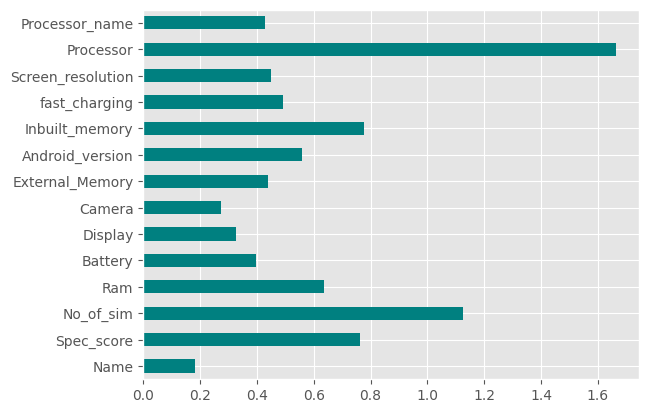

In [148]:
plt.style.use("ggplot")
importance = mutual_info_classif(x, y)
feature_impo = pd.Series(importance, x.columns[0:len(x.columns)])
feature_impo.plot(kind = "barh", color = "teal")
plt.show()

In [149]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [151]:
Pipelines = {
  "LinearRegression" : Pipeline([("Scaler", StandardScaler()), ("Regressor", LinearRegression())]),
  "Lasso": Pipeline([("Scaler", StandardScaler()), ("Regressor", Lasso())]),
  "Ridge": Pipeline([("Scaler", StandardScaler()), ("Regressor", Ridge())]),
  "ElasticNet": Pipeline([("Scaler", StandardScaler()), ("Regressor", ElasticNet())]),
  "DecisionTreeRegressor": Pipeline([("Regressor", DecisionTreeRegressor())]),
  "RandomForestRegressor": Pipeline([("Scaler", StandardScaler()), ("Regressor", RandomForestRegressor())])
}

In [152]:
for name, pipeline in Pipelines.items():
  accuracy = pipeline.fit(xtrain, ytrain)
  print(f"{name} Fitted Successfully...")

LinearRegression Fitted Successfully...
Lasso Fitted Successfully...
Ridge Fitted Successfully...
ElasticNet Fitted Successfully...
DecisionTreeRegressor Fitted Successfully...
RandomForestRegressor Fitted Successfully...


In [154]:
for name, pipeline in Pipelines.items():
  accuracy = pipeline.score(xtest, ytest)
  print(f"Accuracy of {name}: {accuracy:.2f}")

Accuracy of LinearRegression: 0.67
Accuracy of Lasso: 0.67
Accuracy of Ridge: 0.67
Accuracy of ElasticNet: 0.61
Accuracy of DecisionTreeRegressor: 0.77
Accuracy of RandomForestRegressor: 0.84


In [155]:
for name, pipeline in Pipelines.items():
    y_pred = pipeline.predict(xtest)
    print(f"Predictions for {name} : {y_pred}")

Predictions for LinearRegression : [ 16541.49804469  46108.42634095  19626.94239872  34191.92669872
  34428.66710684  20665.82067247  29360.86598895  18850.95266539
  34697.18205484  23985.36377158  46655.88331704  91611.60564047
  15446.97001751   3634.95195203  18771.77348246 119009.49531742
  59127.15822866  44293.90716936  15325.37006042  51242.50438594
  68985.35030117   5434.13145665  28165.86069877  17006.63701797
  58326.94774043  59726.0084564   23764.53831339  25373.71599288
  21076.90924189  13490.12823619  20886.72270835  13083.53618775
   1783.06942792  19674.1896474    7839.16016174  30627.38360094
  38836.84606501  73775.70402809  61437.72389678 -27383.94953721
  12782.11249416  40431.66274315  80118.80151505   2219.12531249
  31875.71600949  12530.70299314  34812.32809994  82130.75339438
  59469.0978362   96417.8988774   21460.74921481  30185.6569663
  80257.10006915   7107.48193548  23716.07949287  23049.54399536
   2547.93213248  57254.48948161  64959.54632133  40862.

In [156]:
y_pred = pipeline.predict(xtest)

In [157]:
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(mean_absolute_percentage_error(ytest, y_pred)))
r2 = r2_score(ytest, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared: {r2:.2f}")


MAE: 7345.86
MSE: 176512484.94
RMSE: 13285.80
MAPE: 0.20%
R-squared: 0.84


In [158]:
outcome = {
  "Actual Price" : ytest,
  "Predicted Price" : y_pred
}
df_out = pd.DataFrame(outcome)
df_out.head(25)

,Actual Price,Predicted Price
881,12900,12837.872500
1107,44990,35050.450000
820,16299,21375.780000
1080,24990,23414.520000
37,28990,42572.083333
167,37990,22649.515833
1201,28517,34536.506667
828,18990,18600.056667
310,39999,34633.002500
255,11499,12277.940000


In [160]:
df_out.to_excel("MOBILE.xlsx", index = False)

<Axes: xlabel='Price'>

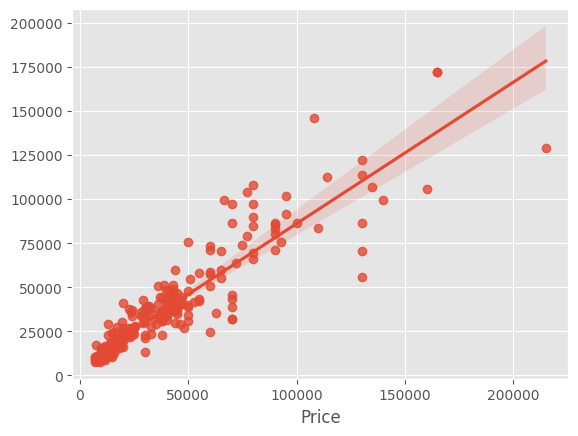

In [161]:
## Checking for corellation between actual price and predicted price
sns.regplot(x = ytest, y = y_pred)